chagements par rapport à arima v2: <br>
 - on se place dans gm <br>
 - on prend arima en R

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import nibabel as nib

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

## on se place dans grey matter

In [3]:
import numpy as np     
import nibabel as nib     
import os
# on regarde le grey matter
img1 = '/scratch/user/hirsch/datadir/data_results_py_backup/structural/norm_files/wc1t0009_t1_s03.nii'
i1=nib.load(img1)         
i1array=np.asarray(i1.dataobj).copy() 
i1array[(10 * i1array )< 2] = 0
    # binary mask the resulting image
i1array[i1array > 0] = 1
gmCoord = np.transpose(np.nonzero(i1array))

    

In [31]:
print i1array.shape
print i1array.ndim
print i1array.size

(91, 109, 91)
3
902629


In [33]:
print gmCoord.shape
print gmCoord.ndim
print gmCoord.size

(148054, 3)
2
444162


In [5]:
gmCoord.shape

(148054, 3)

In [40]:
print gmCoord[0]
print gmCoord[0].ndim
print gmCoord[0][0]

[10 42 32]
1
10


In [53]:
coord4D = [gmCoord[0][0], gmCoord[0][1], gmCoord[0][2], :]
#coord4D = coord4D.append(gmCoord[0][0]).append(gmCoord[0][1]).append(gmCoord[0][2]).append(':')
#coord4D.append(0:240)
print coord4D
print bpedarray[coord4D].shape

SyntaxError: invalid syntax (<ipython-input-53-8c39e9361adb>, line 1)

In [55]:
print bpedarray[gmCoord[0][0], gmCoord[0][1], gmCoord[0][2], :].shape
print bpedarray[gmCoord[0][0], gmCoord[0][1], gmCoord[0][2], :]

(240,)
[  3.52134657  -6.23378086   7.16301107  -0.85338044   0.38919878
   9.70041084  -0.10137814  -0.97010434   4.39753199   7.37915182
   3.02741289   0.27556968   9.07578087  -0.36453417   0.45492637
   8.01819897  -7.45907688   1.12639153  -1.86202526 -14.18193626
   9.10979843  -2.3510561  -15.02653503   0.3556169   -6.79150009
   1.37233281  -0.06516778 -10.33544922   7.74271011  -3.84441495
 -11.46653557   0.19664401  -9.37285137  -2.64104748   0.67968708
  -8.07962322  -4.94610643  -3.77980924   1.60525918  -7.6991148
 -10.47699547   8.51212692  -1.465832    -5.80942059   5.0622263
  -3.1159935    2.34565997  13.70955658   9.16820717   1.24649346
  -1.70214951  -2.99391389  -9.32885551  -1.67303038   4.66308069
  -8.80695152 -14.28727722  -5.18984604  11.27925968   4.45911932
 -11.84894371   3.60017395   3.12315154   1.47067821  15.64547634
  -9.02764702 -19.30842781  -5.74106359 -10.99218273   1.44442475
   9.30507374   1.9418664    7.34669495   7.96181488   9.51987457
   7.

In [26]:
# A=np.array([0,1,2]).reshape((3,1)) 
#gmCoord[0].reshape = (4L, 1L)

coord=np.array(gmCoord[0]).reshape((3,1)) 
print coord.shape
print coord.ndim
print coord


(3, 1)
2
[[10]
 [42]
 [32]]


In [39]:
coord=np.array(gmCoord[0]).reshape((1,3)) 
print coord.shape
print coord.ndim
print coord
coord_list = list(list(coord))
coord_list.append(2)
print coord_list

(1, 3)
2
[[10 42 32]]
[array([10, 42, 32]), 2]


In [13]:
# bpfile
bpFile = '/scratch/user/hirsch/datadir4/data_results_py/functionnal/bandpassedFile/wcrat0009_epi_s04_d0001_merged_bp.nii.gz'
bped =nib.load(bpFile)
bpedarray = np.asarray(bped.dataobj).copy()

In [32]:
print bpedarray.shape
print bpedarray.ndim
print bpedarray.size

(91, 109, 91, 240)
4
216630960


In [34]:
print bpedarray.shape[3]

240


In [29]:
bpedarray[coord].shape

(3, 1, 109, 91, 240)

In [30]:
bpedarray[gmCoord[0]].ndim

4

## Plot one voxel from merged normalized file

In [8]:
mergedfile = '/tmp/tmpPLoSEw/prebandpass/fsl_merge/wcrat0009_epi_s04_d0001_merged.nii.gz'
merged =nib.load(mergedfile)
mergedarray = np.asarray(merged.dataobj).copy()

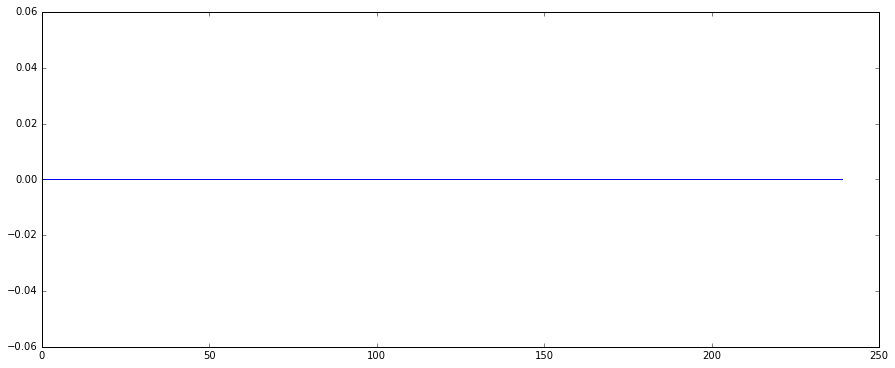

In [12]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
ts_merged =  mergedarray[10, 42,  39, :]
plt.plot(ts_merged)

In [3]:

datafile = '/scratch/user/hirsch/datadir/data_results/arima/wcrat0009_epi_s04_d0001_merged_bp.nii.gz'

## Plot same voxel after bandpass from merged normalized file

In [4]:
import nibabel as nib
img = nib.load(datafile)

In [5]:
imgarray=np.asarray(img.dataobj).copy()

In [6]:
dims= imgarray.shape
print dims

(91, 109, 91, 240)


In [7]:
# a[nonzero(a)]
imgarray[np.nonzero(imgarray)]

array([ -7.57514051e-09,   1.48284296e-09,   9.92195393e-09, ...,
         7.89371654e-02,  -1.44566566e-01,   1.69289768e-01], dtype=float32)

In [8]:
# 
# np.transpose(np.nonzero(x))
np.transpose(np.nonzero(imgarray))

array([[  0,   0,  11,   0],
       [  0,   0,  11,   1],
       [  0,   0,  11,   2],
       ..., 
       [ 90, 108,  14, 237],
       [ 90, 108,  14, 238],
       [ 90, 108,  14, 239]])

In [9]:
ts =  imgarray[90, 108,  14, :]

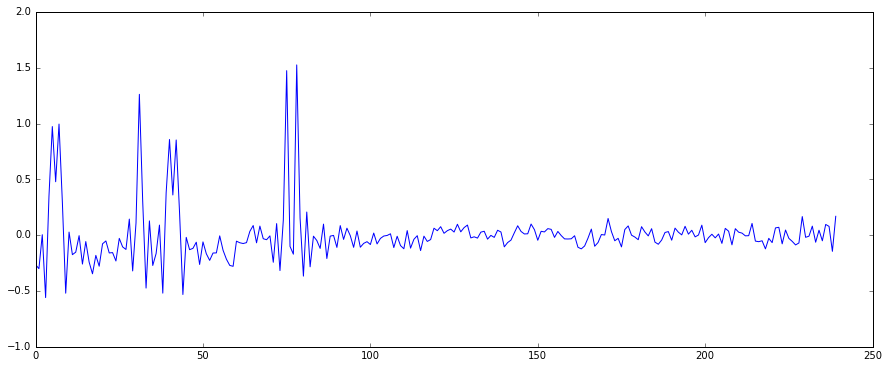

In [10]:
plt.plot(ts)

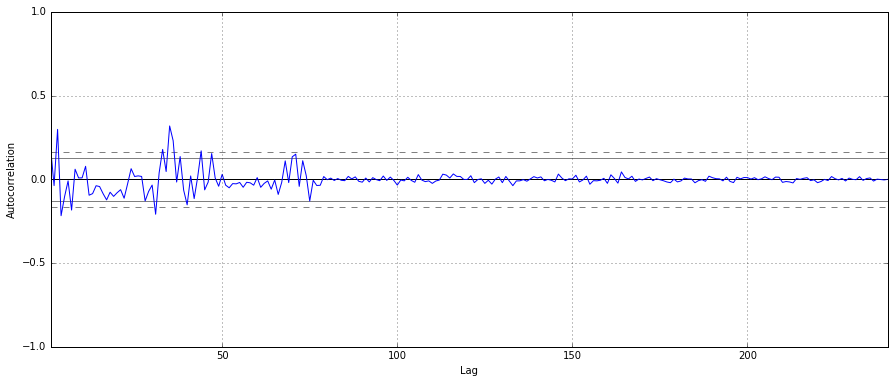

In [11]:

from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(ts)
pyplot.show()

In [12]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

for p in range(6):
    for d in range(2):
        for q in range(4):
            try:
                arima_mod=ARIMA(ts,(p,d,q)).fit(transparams=True)

                x=arima_mod.aic

                x1= p,d,q
                print (x1,x)

                aic.append(x)
                pdq.append(x1)
            except:
                pass
                # ignore the error and go on

((0, 0, 0), 9.1857527290895007)
((0, 0, 1), -65.17133644774196)
((0, 0, 2), -89.12003831578579)
((0, 0, 3), -93.76635442211727)
((0, 1, 0), 124.10801835385266)
((0, 1, 1), 17.64257986682287)
((0, 1, 3), -80.84704316101829)
((1, 0, 0), 2.2292768987908858)
((1, 1, 0), 93.18513942444235)
((2, 0, 0), 2.8380076651866375)
((2, 1, 0), 10.071998222243451)
((3, 0, 0), -23.878245663298117)
((3, 1, 0), -0.23038788052338077)
((4, 0, 0), -69.17466519517916)
((4, 1, 0), -43.48796933514393)
((5, 0, 0), -78.94497640689804)
((5, 1, 0), -47.68878962750023)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  239
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -43.593
Method:                       css-mle   S.D. of innovations              0.290
Date:                Tue, 04 Apr 2017   AIC                             93.185
Time:                        16:44:19   BIC                            103.615
Sample:                             1   HQIC                            97.388
                                                                              
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0015      0.014      0.109      0.913        -0.026     0.029
ar.L1.D.y     -0.3587      0.060     -5.946      0.000        -0.477    -0.240
                                    Roots           

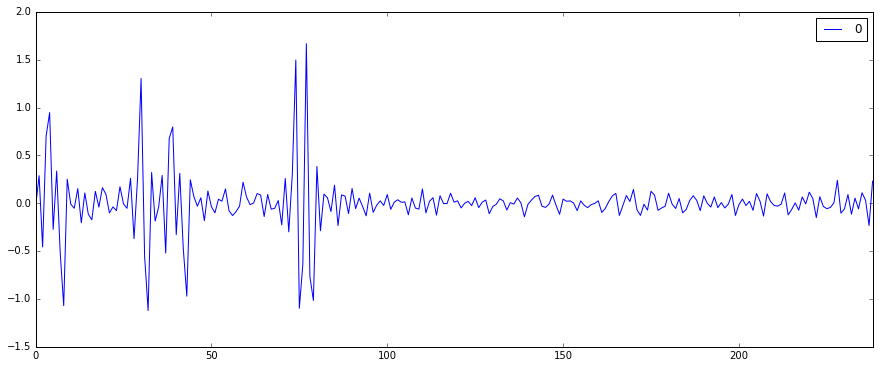

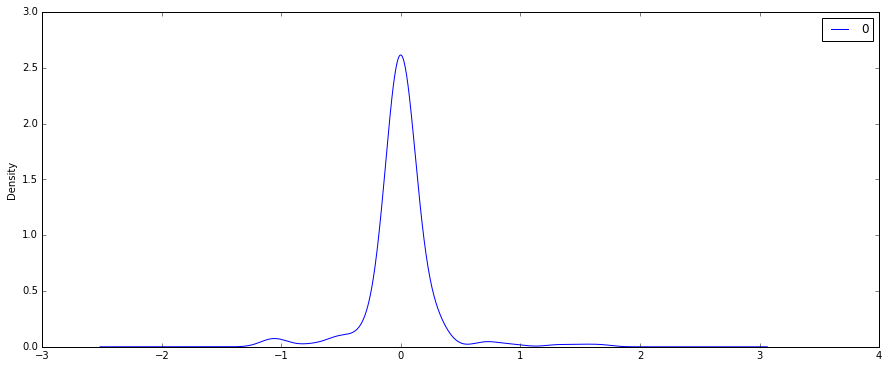

                0
count  239.000000
mean    -0.000057
std      0.290913
min     -1.121302
25%     -0.065328
50%     -0.003163
75%      0.076843
max      1.668872


In [19]:


from matplotlib import pyplot

# fit model
model = ARIMA(ts, order=(1,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [21]:
from statsmodels.stats.diagnostic import acorr_ljungbox
# statsmodels.stats.diagnostic.acorr_ljungbox(residuals, lags=None, boxpierce=False)

acorr_ljungbox(residuals, lags=None, boxpierce=False)

(array([   9.45683722,   45.07043543,   79.67140445,   97.4827269 ,
          98.51376395,  101.62242298,  110.61509979,  113.41609335,
         113.41886064,  113.42312328,  117.72127693,  119.94394521,
         120.94099127,  121.3413709 ,  121.81260692,  121.89804141,
         122.59721358,  122.75877938,  122.84213819,  122.87771214,
         123.01271026,  125.42708483,  125.43194438,  127.90203678,
         127.90313655,  128.13142394,  129.30181374,  133.26221887,
         133.31453278,  134.96768601,  151.2549244 ,  151.60928918,
         156.29652574,  163.48315275,  177.72900075,  181.72397708,
         191.91110703,  198.31550574,  199.16472308,  205.75940871]),
 array([  2.10363482e-03,   1.63335016e-10,   3.61008647e-17,
          3.37763331e-20,   1.08699898e-19,   1.15066919e-19,
          6.84439244e-21,   7.55025627e-21,   2.95601718e-20,
          1.08673046e-19,   5.20486498e-20,   6.34131767e-20,
          1.31196191e-19,   3.43545023e-19,   8.41390172e-19,
        

In [17]:
# rtj_coords = (-46, -68, 32)
imgarray[90, 108,  14, :]

array([ -2.63727397e-01,  -3.00078332e-01,   4.47391719e-03,
        -5.59085965e-01,   3.48878026e-01,   9.73491490e-01,
         4.79115903e-01,   9.95757937e-01,   2.97108173e-01,
        -5.19547284e-01,   2.79060081e-02,  -1.74437836e-01,
        -1.51665717e-01,  -4.12460417e-03,  -2.58601636e-01,
        -5.69550991e-02,  -2.41555497e-01,  -3.45733881e-01,
        -1.80880025e-01,  -2.77787805e-01,  -7.72425234e-02,
        -5.15229404e-02,  -1.59032241e-01,  -1.56047970e-01,
        -2.30981380e-01,  -2.85182595e-02,  -1.04647458e-01,
        -1.27673656e-01,   1.44288450e-01,  -3.20270807e-01,
         1.10478222e-01,   1.26235807e+00,   3.00465226e-01,
        -4.73758996e-01,   1.28245726e-01,  -2.71313071e-01,
        -1.64639056e-01,   9.06835571e-02,  -5.19190490e-01,
         3.79675239e-01,   8.57573211e-01,   3.60483408e-01,
         8.53272319e-01,   2.04747006e-01,  -5.31456351e-01,
        -1.94815695e-02,  -1.29711568e-01,  -1.18031204e-01,
        -6.26846179e-02,